In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#activate inline visualization, You can ignore plt.show() command 
%matplotlib inline 
# supress warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# video_gm = pd.read_csv('https://query.data.world/s/srgmggc27wsevjcgo3idzko6scwls3')
# video_gm.head()

In [3]:
df = pd.read_csv('https://query.data.world/s/srgmggc27wsevjcgo3idzko6scwls3', dtype={"Year_of_Release":object})


In [4]:
video_gm = df
video_gm.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
video_gm.NA_Sales.mean()

0.2633303427238687

In [6]:
100*video_gm.Critic_Score.isnull().sum()/len(video_gm.index)

51.330821221364914

In [7]:
l = len(video_gm.index)

In [8]:
help(video_gm.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. deprecated:: 0.23.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If any NA values are present, drop t

In [9]:
# video_gm = video_gm[~video_gm.Name.isnull()]
video_gm.dropna(subset=['Name'], inplace=True)

In [10]:
100*video_gm.Critic_Score.isnull().sum()/len(video_gm.index)

51.32499850451636

In [11]:
# What is the Critic_Score at 90th percentile?

video_gm.Critic_Score.quantile([.9])

0.9    85.0
Name: Critic_Score, dtype: float64

In [12]:
video_gm.describe(percentiles=[0.25,0.5,0.75,0.9])

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,8137.000000,8137.000000,7590.000000
mean,0.263255,0.145010,0.077610,0.047333,0.533462,68.967679,26.360821,162.229908
std,0.813475,0.503303,0.308836,0.186721,1.547956,13.938165,18.980495,561.282326
min,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
90%,0.610000,0.350000,0.170000,0.100000,1.200000,85.000000,54.000000,315.100000
max,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [13]:
#impute missing values. Intelligent method. 
100*video_gm.isnull().sum()/len(video_gm.index)

Name                0.000000
Platform            0.000000
Year_of_Release     1.609140
Genre               0.000000
Publisher           0.323024
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.324999
Critic_Count       51.324999
User_Score         40.090925
User_Count         54.597117
Developer          39.606389
Rating             40.479751
dtype: float64

### we need to find a top level category 
- For example for filling ciritic score we can use Publisher/Developer as category.
- Impute value based on these catoegory
- calculate mean, median critic score for a particular publisher and impute that value. 

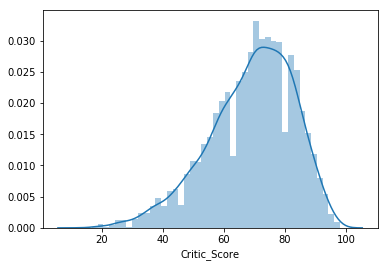

In [14]:
sns.distplot(video_gm.Critic_Score.dropna())

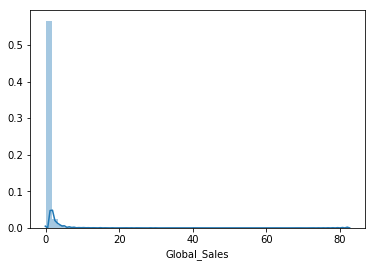

In [15]:
sns.distplot(video_gm.Global_Sales.dropna())

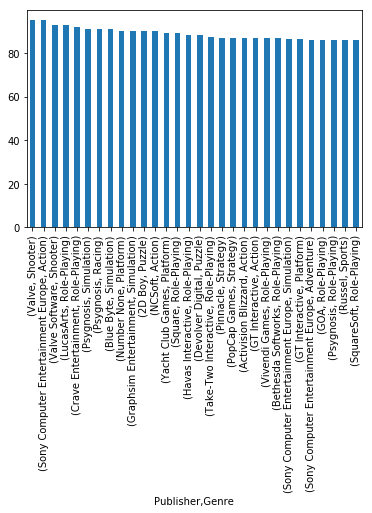

In [16]:
video_gm.groupby(['Publisher', 'Genre'])['Critic_Score'].mean().sort_values(ascending=False)[:30].plot.bar()


In [17]:
# make imputation
video_gm['Critic_Score_Imputed']= video_gm.groupby('Publisher')['Critic_Score'].apply(lambda x:x.fillna(x.median()))

In [18]:
video_gm.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Critic_Score_Imputed
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,76.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,76.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,82.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,76.0


In [19]:
100*video_gm.isnull().sum()/len(video_gm.index)

Name                     0.000000
Platform                 0.000000
Year_of_Release          1.609140
Genre                    0.000000
Publisher                0.323024
NA_Sales                 0.000000
EU_Sales                 0.000000
JP_Sales                 0.000000
Other_Sales              0.000000
Global_Sales             0.000000
Critic_Score            51.324999
Critic_Count            51.324999
User_Score              40.090925
User_Count              54.597117
Developer               39.606389
Rating                  40.479751
Critic_Score_Imputed     5.485434
dtype: float64

### Derived Variables

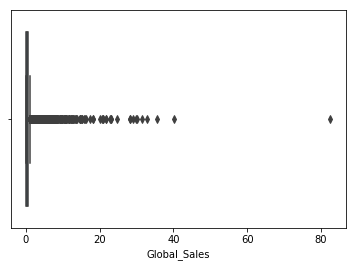

In [20]:
sns.boxplot(video_gm.Global_Sales)

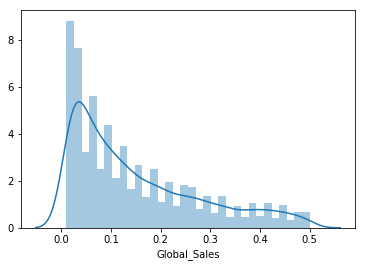

In [21]:
 sns.distplot(video_gm.Global_Sales.dropna()[video_gm.Global_Sales<=0.5])

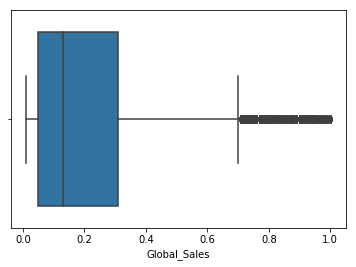

In [22]:
sns.boxplot(video_gm.Global_Sales.dropna()[video_gm.Global_Sales<=1])

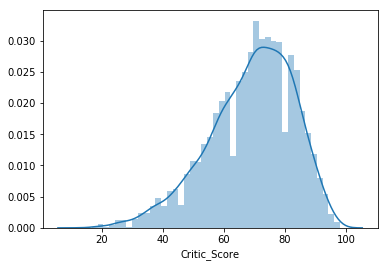

In [23]:
 sns.distplot(video_gm.Critic_Score.dropna())

In [24]:
video_gm.User_Score.dtype

dtype('O')

In [25]:
video_gm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 17 columns):
Name                    16717 non-null object
Platform                16717 non-null object
Year_of_Release         16448 non-null object
Genre                   16717 non-null object
Publisher               16663 non-null object
NA_Sales                16717 non-null float64
EU_Sales                16717 non-null float64
JP_Sales                16717 non-null float64
Other_Sales             16717 non-null float64
Global_Sales            16717 non-null float64
Critic_Score            8137 non-null float64
Critic_Count            8137 non-null float64
User_Score              10015 non-null object
User_Count              7590 non-null float64
Developer               10096 non-null object
Rating                  9950 non-null object
Critic_Score_Imputed    15800 non-null float64
dtypes: float64(9), object(8)
memory usage: 2.3+ MB


In [26]:
# video_gm.User_Score.astype('float64')
video_gm.User_Score = pd.to_numeric(video_gm.User_Score, errors='cooerce')

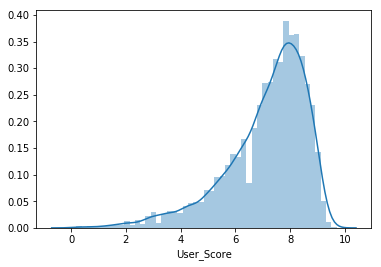

In [27]:
 sns.distplot(video_gm.User_Score.dropna())
    

In [28]:
# video_gm.Year_of_Release = pd.to_numeric(video_gm.Year_of_Release, errors='cooerce')
# sns.distplot(video_gm.Year_of_Release.dropna())


In [29]:
video_gm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 17 columns):
Name                    16717 non-null object
Platform                16717 non-null object
Year_of_Release         16448 non-null object
Genre                   16717 non-null object
Publisher               16663 non-null object
NA_Sales                16717 non-null float64
EU_Sales                16717 non-null float64
JP_Sales                16717 non-null float64
Other_Sales             16717 non-null float64
Global_Sales            16717 non-null float64
Critic_Score            8137 non-null float64
Critic_Count            8137 non-null float64
User_Score              7590 non-null float64
User_Count              7590 non-null float64
Developer               10096 non-null object
Rating                  9950 non-null object
Critic_Score_Imputed    15800 non-null float64
dtypes: float64(10), object(7)
memory usage: 2.3+ MB


## Dist plot and histogram are good options for continuous  and numeric data

## For columns like year of release use bar plot, count plot

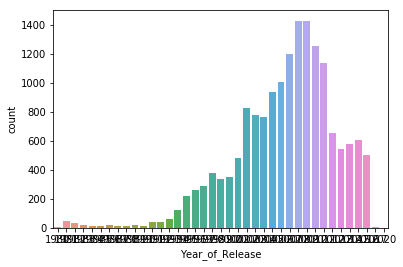

In [33]:
sns.countplot(video_gm.Year_of_Release.dropna())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

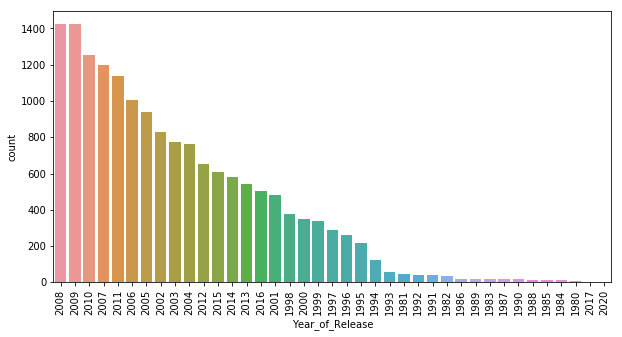

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(video_gm.Year_of_Release.dropna(), order = video_gm.Year_of_Release.value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

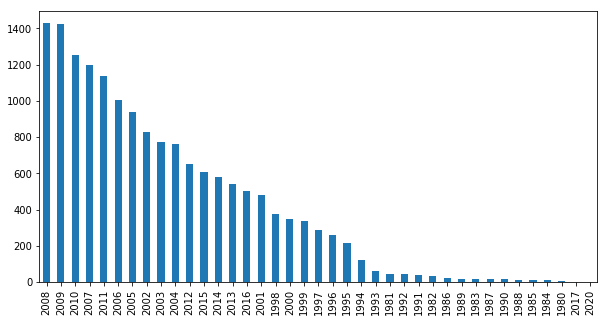

In [44]:
plt.figure(figsize=(10,5))
video_gm.Year_of_Release.value_counts().plot.bar()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

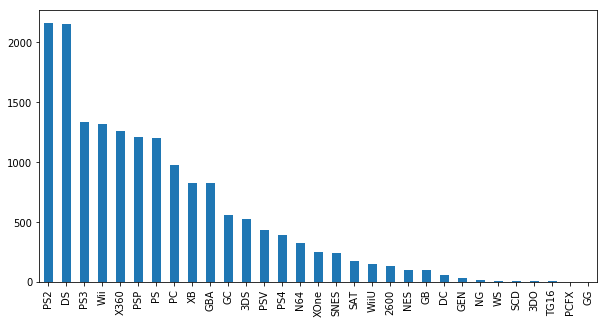

In [45]:
plt.figure(figsize=(10,5))
video_gm.Platform.value_counts().plot.bar()
plt.xticks(rotation=90)

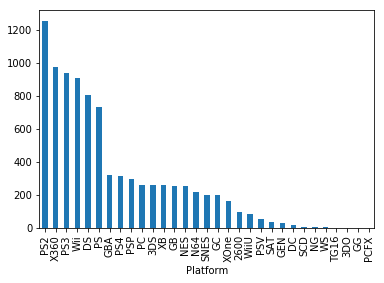

In [47]:
# most popular platform by sales
video_gm.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).plot.bar()

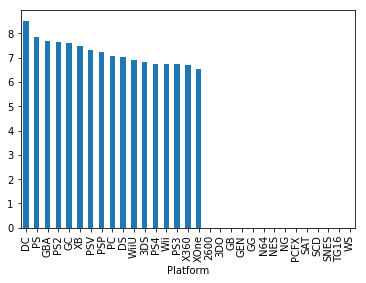

In [50]:
video_gm.groupby('Platform')['User_Score'].mean().sort_values(ascending=False).plot.bar()

In [51]:
video_gm['popluarityUser'] = video_gm['User_Score']*video_gm['User_Count']

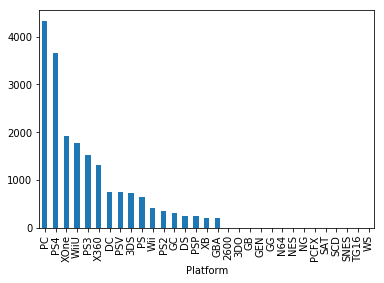

In [52]:
video_gm.groupby('Platform')['popluarityUser'].mean().sort_values(ascending=False).plot.bar()

In [55]:
# Plot a correlation plot, check how user and critic score are related to each other?
# correlation plot is only drwan for numerical variables
video_gm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 18 columns):
Name                    16717 non-null object
Platform                16717 non-null object
Year_of_Release         16448 non-null object
Genre                   16717 non-null object
Publisher               16663 non-null object
NA_Sales                16717 non-null float64
EU_Sales                16717 non-null float64
JP_Sales                16717 non-null float64
Other_Sales             16717 non-null float64
Global_Sales            16717 non-null float64
Critic_Score            8137 non-null float64
Critic_Count            8137 non-null float64
User_Score              7590 non-null float64
User_Count              7590 non-null float64
Developer               10096 non-null object
Rating                  9950 non-null object
Critic_Score_Imputed    15800 non-null float64
popluarityUser          7590 non-null float64
dtypes: float64(11), object(7)
memory usage: 2.4+ MB


In [57]:
video_num = video_gm.select_dtypes(include='float64')
video_num

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Critic_Score_Imputed,popluarityUser
0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,76.0,2576.0
1,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,76.0,NaN
2,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,82.0,5884.7
3,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,80.0,1536.0
4,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,76.0,NaN
5,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,76.0,NaN
6,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,89.0,3663.5
7,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,58.0,851.4
8,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,87.0,4989.6
9,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,76.0,NaN


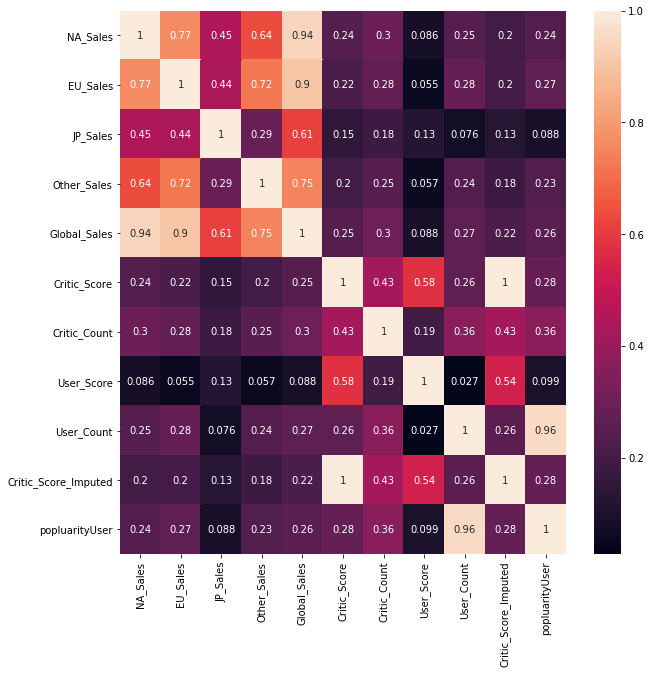

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(video_num.corr(), annot=True)

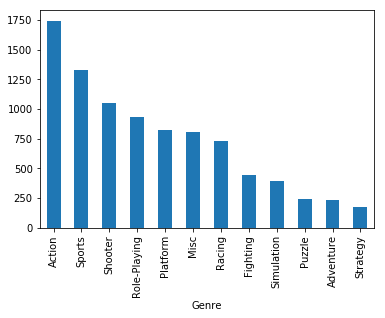

In [62]:
# Plot to check which gener sold the most in the global market according to the global sales?
video_gm.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).plot.bar()

In [64]:
video_gm.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

Publisher
Nintendo                                  1788.81
Electronic Arts                           1116.96
Activision                                 731.16
Sony Computer Entertainment                606.48
Ubisoft                                    471.61
Take-Two Interactive                       403.82
THQ                                        338.44
Konami Digital Entertainment               282.39
Sega                                       270.35
Namco Bandai Games                         254.62
Microsoft Game Studios                     248.32
Capcom                                     200.02
Atari                                      156.83
Warner Bros. Interactive Entertainment     151.79
Square Enix                                144.35
Disney Interactive Studios                 117.37
Eidos Interactive                           98.65
LucasArts                                   85.83
Bethesda Softworks                          85.05
Midway Games                            

In [69]:
video_gm.Publisher.value_counts().sort_values(ascending=False)

Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   706
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Eidos Interactive                          198
Midway Games                               198
Microsoft Game Studios                     191
505 Games                                  191
D3Publisher  

In [71]:
## tables
## top genre prdoucers
## which producer is producing most games in whcih genre
publisher = video_gm.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).index[0:20]
topPublisher = video_gm[video_gm['Publisher'].isin(publisher)]
topPublisher.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Critic_Score_Imputed,popluarityUser
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,76.0,2576.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,82.0,5884.7
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,80.0,1536.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN


In [77]:
x = video_gm.groupby(['Publisher', 'Genre']).count()
x

Name  Platform  Year_of_Release  \
Publisher                    Genre                                           
10TACLE Studios              Adventure        1         1                1   
                             Puzzle           1         1                1   
                             Strategy         1         1                1   
1C Company                   Racing           1         1                1   
                             Role-Playing     1         1                1   
                             Strategy         1         1                1   
20th Century Fox Video Games Action           4         4                4   
                             Shooter          1         1                1   
2D Boy                       Puzzle           1         1                1   
3DO                          Action          17        17               17   
                             Adventure        3         3                3   
                             Fighting         1         1                1   
                             Platform         1         1                1   
                             Puzzle           1         1                1   
                             Role-Playing     1         1                1   
                             Shooter          5         5                5   
                             Sports           6         6                6   
                             Strategy         1         1                1   
49Games                      Sports           1         1                1   
505 Games                    Action          21        21               21   
                             Adventure        7         7                7   
                             Fighting        10        10               10   
                             Misc            31        31               31   
                             Platform         6         6                6   
                             Puzzle          15        15               15   
                             Racing           2         2                2   
                             Role-Playing    10        10               10   
                             Shooter         18        18               18   
                             Simulation      41        41               41   
                             Sports          27        27               27   
...                                         ...       ...              ...   
Zoo Games                    Adventure        1         1                1   
                             Misc            11        11               11   
                             Puzzle           3         3                3   
                             Racing           6         6                6   
                             Shooter          4         4                4   
                             Simulation       1         1                1   
                             Sports           4         4                4   
Zushi Games                  Action           1         1                1   
                             Adventure        1         1                1   
                             Misc             1         1                1   
                             Puzzle           2         2                2   
                             Racing           3         3                3   
                             Role-Playing     1         1                1   
                             Shooter          2         2                2   
                             Simulation       2         2                2   
                             Sports           3         3                3   
                             Strategy         2         2                2   
bitComposer Games            Racing           1         1                1   
                             Simulation       4         4        

In [78]:
x.unstack()

Name                            \
Genre                                  Action Adventure Fighting   Misc   
Publisher                                                                 
10TACLE Studios                           NaN       1.0      NaN    NaN   
1C Company                                NaN       NaN      NaN    NaN   
20th Century Fox Video Games              4.0       NaN      NaN    NaN   
2D Boy                                    NaN       NaN      NaN    NaN   
3DO                                      17.0       3.0      1.0    NaN   
49Games                                   NaN       NaN      NaN    NaN   
505 Games                                21.0       7.0     10.0   31.0   
5pb                                       5.0      50.0      1.0    NaN   
7G//AMES                                  NaN       NaN      NaN    1.0   
989 Sports                                NaN       NaN      NaN    NaN   
989 Studios                               2.0       NaN      NaN    NaN   
AQ Interactive                            NaN       NaN      2.0    3.0   
ASC Games                                 1.0       NaN      NaN    NaN   
ASCII Entertainment                       NaN       2.0      NaN    2.0   
ASCII Media Works                         NaN       7.0      NaN    NaN   
ASK                                       NaN       NaN      NaN    1.0   
Abylight                                  1.0       NaN      NaN    NaN   
Acclaim Entertainment                    14.0       4.0     31.0    5.0   
Accolade                                  NaN       NaN      NaN    NaN   
Ackkstudios                               4.0       1.0      NaN    NaN   
Acquire                                   2.0       2.0      NaN    NaN   
Activision                              311.0      26.0      7.0  103.0   
Activision Blizzard                       1.0       NaN      NaN    NaN   
Activision Value                          1.0       NaN      NaN    1.0   
Adeline Software                          1.0       NaN      NaN    NaN   
Aerosoft                                  NaN       NaN      NaN    NaN   
Agatsuma Entertainment                    1.0       NaN      NaN    1.0   
Agetec                                    2.0       NaN      1.0    1.0   
Aksys Games                               1.0       3.0      NaN    NaN   
Alawar Entertainment                      1.0       NaN      NaN    NaN   
...                                       ...       ...      ...    ...   
Wargaming.net                             NaN       NaN      NaN    NaN   
Warner Bros. Interactive Entertainment  169.0       3.0     11.0   21.0   
Warp                                      NaN       1.0      NaN    NaN   
WayForward Technologies                   NaN       1.0      NaN    NaN   
Westwood Studios                          NaN       NaN      NaN    NaN   
White Park Bay Software                   NaN       NaN      NaN    NaN   
Wizard Video Games                        1.0       NaN      NaN    NaN   
XS Games                                  NaN       NaN      NaN    2.0   
Xicat Interactive                         NaN       NaN      NaN    NaN   
Xing Entertainment                        NaN       NaN      1.0    NaN   
Xplosiv                                   NaN       NaN      NaN    3.0   
Xseed Games                               1.0       1.0      NaN    NaN   
Yacht Club Games                          1.0       NaN      NaN    NaN   
Yamasa Entertainment                      NaN       NaN      NaN    2.0   
Yeti                                      1.0       9.0      1.0    NaN   
Yuke's                                    NaN       NaN      2.0    NaN   
Yumedia                                   NaN       1.0      NaN    NaN   
Zenrin                                    NaN       NaN      NaN    2.0   
Zoo Digital Publishing                    8.0       7.0      3.0   18.0   
Zoo Games                                 3.0       1.0      NaN  

In [76]:
x.unstack().Name.idxmax(axis=1)

Publisher
10TACLE Studios                              Adventure
1C Company                                      Racing
20th Century Fox Video Games                    Action
2D Boy                                          Puzzle
3DO                                             Action
49Games                                         Sports
505 Games                                   Simulation
5pb                                          Adventure
7G//AMES                                    Simulation
989 Sports                                      Sports
989 Studios                                     Sports
AQ Interactive                                    Misc
ASC Games                                       Action
ASCII Entertainment                             Sports
ASCII Media Works                            Adventure
ASK                                               Misc
Abylight                                        Action
Acclaim Entertainment                           Sports
